In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit,root_scalar,newton,bisect
from sklearn.metrics import mean_squared_error

data = pd.read_csv('aol_data.csv')

print("Struktur data :")
print(data.head())

Struktur data :
     M1    M2    M3    M4    M5    M6    M7    M8    M9   M10  ...   M135  \
0  1863  1614  2570  1685  2101  1811  2457  2171  2134  2502  ...  14917   

    M136   M137   M138   M139   M140   M141   M142   M143   M144  
0  15046  15556  15893  16388  16782  16716  17033  16896  17689  

[1 rows x 144 columns]


In [2]:
x = np.array([int(col[1:]) for col in data.columns])
y = np.array(data.iloc[0]) 

print(x)
print(y)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144]
[ 1863  1614  2570  1685  2101  1811  2457  2171  2134  2502  2358  2399
  2048  2523  2086  2391  2150  2340  3129  2277  2964  2997  2747  2862
  3405  2677  2749  2755  2963  3161  3623  2768  3141  3439  3601  3531
  3477  3376  4027  3175  3274  3334  3964  3649  3502  3688  3657  4422
  4197  4441  4736  4521  4485  4644  5036  4876  4789  4544  4975  5211
  4880  4933  5079  5339  5232  5520  5714  5260  

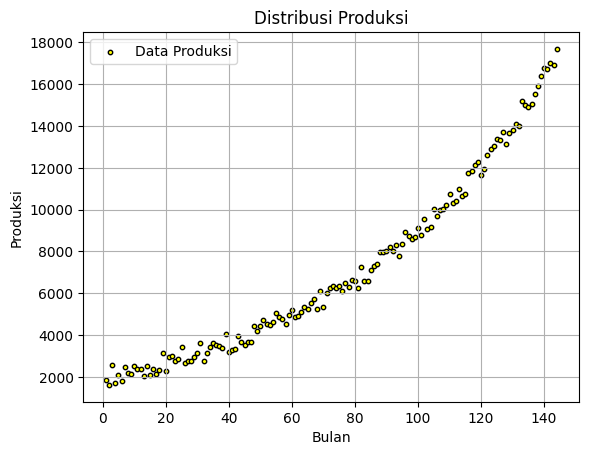

In [3]:
plt.scatter(x, y, c='yellow', s=10, label="Data Produksi", edgecolors='Black')
plt.title("Distribusi Produksi")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()

In [4]:
def f_exponensial(x,a,b):
    return a * np.exp(b * x)


Metode Numerik:
a = 1937.014, b = 0.015
MSE: 88911.150, Error: 0.042%
Prediksi x untuk y = 25.000: 166.732 bulan


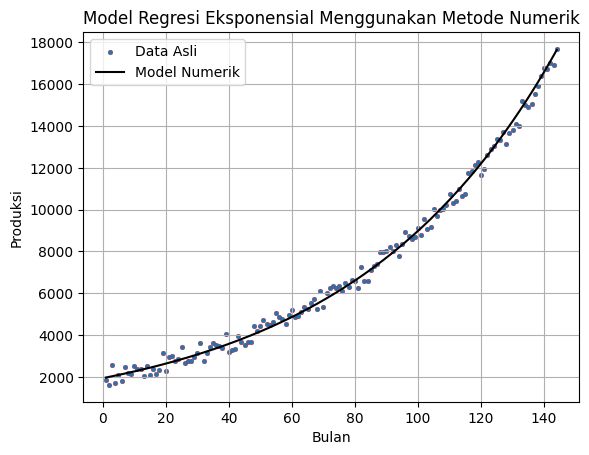

In [ ]:
log_y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
b, log_a = np.linalg.lstsq(A, log_y, rcond=None)[0] 
a = np.exp(log_a) # Mengembalikan nilai a ke domain aslinya

# Model prediksi
y_pred_numerik = f_exponensial(x, a, b)

# MSE dan error
mse_numerik = mean_squared_error(y, y_pred_numerik)
error_numerik = (np.sqrt(mse_numerik)) / (np.sum(y) / len(x))

# Prediksi x untuk y = 25.000
def fungsi_akar_numerik(x):
    return a * np.exp(b * x) - 25000
solusi_numerik = root_scalar(fungsi_akar_numerik, bracket=[x.min(), x.max() + 50])
print("\nMetode Numerik:")
print(f"a = {a:.3f}, b = {b:.3f}")
print(f"MSE: {mse_numerik:.3f}, Error: {error_numerik:.3f}%")
print(f"Prediksi x untuk y = 25.000: {solusi_numerik.root:.3f} bulan")

# Visualisasi hasil
plt.scatter(x, y, s=12, linewidths=0.2, edgecolors='red', label="Data Asli")
plt.plot(x, y_pred_numerik, c='black', label="Model Numerik")
plt.title("Model Regresi Eksponensial Menggunakan Metode Numerik")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()


Metode Least Square:
a = 1937.014, b = 0.015
MSE: 88911.150, Error: 0.042%
Prediksi x untuk y = 25.000: 166.732 bulan


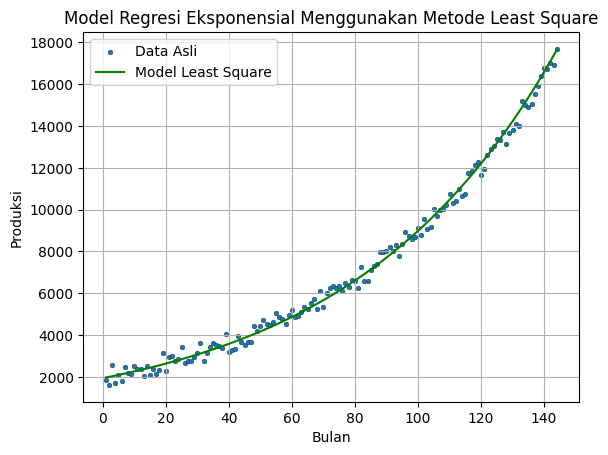

In [14]:
# **2. Metode Least Square**
X = np.column_stack((np.ones_like(x), x))
coeff = np.linalg.inv(X.T @ X) @ X.T @ log_y
log_a_ls, b_ls = coeff
a_ls = np.exp(log_a_ls)

# Model prediksi
y_pred_ls = f_exponensial(x, a_ls, b_ls)

# MSE dan error
mse_ls = mean_squared_error(y, y_pred_ls)
error_ls = (np.sqrt(mse_ls)) / (np.sum(y) / len(x))

# Prediksi x untuk y = 25.000
def fungsi_akar_ls(x):
    return a_ls * np.exp(b_ls * x) - 25000
solusi_ls = root_scalar(fungsi_akar_ls, bracket=[x.min(), x.max() + 50])
print("\nMetode Least Square:")
print(f"a = {a_ls:.3f}, b = {b_ls:.3f}")
print(f"MSE: {mse_ls:.3f}, Error: {error_ls:.3f}%")
print(f"Prediksi x untuk y = 25.000: {solusi_ls.root:.3f} bulan")

# Visualisasi hasil
plt.scatter(x, y, s=12, linewidths=0.2, edgecolors='black', label="Data Asli")
plt.plot(x, y_pred_ls, c='green', label="Model Least Square")
plt.title("Model Regresi Eksponensial Menggunakan Metode Least Square")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()


Metode Curve Fitting:
a = 1991.285, b = 0.015
MSE: 82651.601, Error: 0.040%
Prediksi x untuk y = 25.000: 168.057 bulan


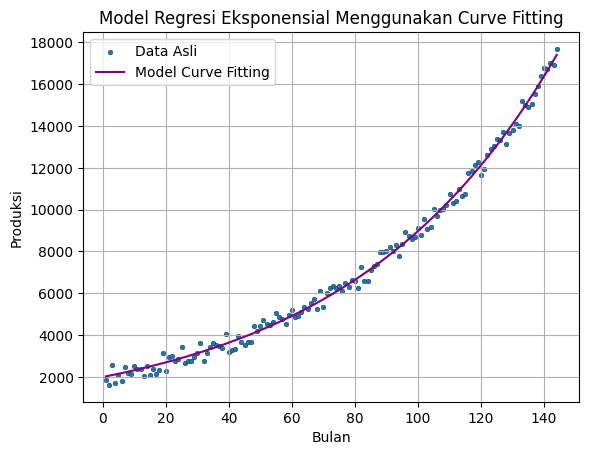

In [19]:
#**3.Metode curve fitting**
popt, _ = curve_fit(f_exponensial, x, y, p0=(1, 0.01))
a_cf, b_cf = popt

# Model prediksi
y_pred_cf = f_exponensial(x, a_cf, b_cf)

# MSE dan error
mse_cf = mean_squared_error(y, y_pred_cf)
error_cf = (np.sqrt(mse_cf)) / (np.sum(y) / len(x))

# Prediksi x untuk y = 25.000
def fungsi_akar_cf(x):
    return a_cf * np.exp(b_cf * x) - 25000
solusi_cf = root_scalar(fungsi_akar_cf, bracket=[x.min(), x.max() + 50])
print("\nMetode Curve Fitting:")
print(f"a = {a_cf:.3f}, b = {b_cf:.3f}")
print(f"MSE: {mse_cf:.3f}, Error: {error_cf:.3f}%")
print(f"Prediksi x untuk y = 25.000: {solusi_cf.root:.3f} bulan")

# Visualisasi hasil
plt.scatter(x, y, s=12, linewidths=0.2, edgecolors='black', label="Data Asli")
plt.plot(x, y_pred_cf, c='purple', label="Model Curve Fitting")
plt.title("Model Regresi Eksponensial Menggunakan Curve Fitting")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()

Parameter a: 1937.014
Parameter b: 0.015
Model Regresi: 1937.014 * e^(0.015*x)
Mean Squared Error (MSE): 88911.150
Error: 0.042
Prediksi analitik untuk produksi 25.000 unit tas adalah bulan ke-166.732


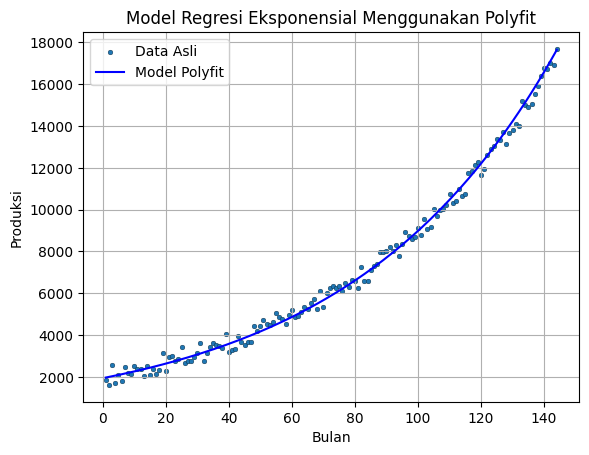

In [29]:
# **4. Metode Polyfit**
# Transformasi data: ln(y)
ln_y = np.log(y)

# Menggunakan np.polyfit untuk fitting data
coefficients = np.polyfit(x, ln_y, deg=1)

# Mendapatkan parameter a dan b dari hasil fitting
b_polyfit = coefficients[0] # Slope (kemiringan)
ln_a_polyfit = coefficients[1] # Intercept (titik potong)
a_polyfit = np.exp(ln_a_polyfit) # Transformasi kembali dari ln(a) ke a

# Membuat model regresi eksponensial
regression_line_polyfit = a_polyfit * np.exp(b_polyfit * x)

# Menghitung nilai MSE dan Error
mse_polyfit = mean_squared_error(y, regression_line_polyfit)
error_polyfit = (np.sqrt(mse_polyfit)) / (np.sum(y) / len(x))

# Menampilkan hasil/Output
print(f"Parameter a: {a_polyfit :.3f}")
print(f"Parameter b: {b_polyfit:.3f}")
print(f"Model Regresi: {a_polyfit:.3f} * e^({b_polyfit:.3f}*x)")
print(f"Mean Squared Error (MSE): {mse_polyfit:.3f}")
print(f"Error: {error_polyfit:.3f}")

# Prediksi bulan untuk produksi 25.000 unit tas
y_target = 25000
x_prediksi_polyfit = (np.log(y_target) - np.log(a_polyfit)) / b_polyfit
print(f"Prediksi analitik untuk produksi 25.000 unit tas adalah bulan ke-{x_prediksi_polyfit:.3f}")
# Visualisasi hasil
plt.scatter(x, y, s=12, linewidths=0.2, edgecolors='black', label="Data Asli")
plt.plot(x, regression_line_polyfit, c='blue', label="Model Polyfit")
plt.title("Model Regresi Eksponensial Menggunakan Polyfit")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()

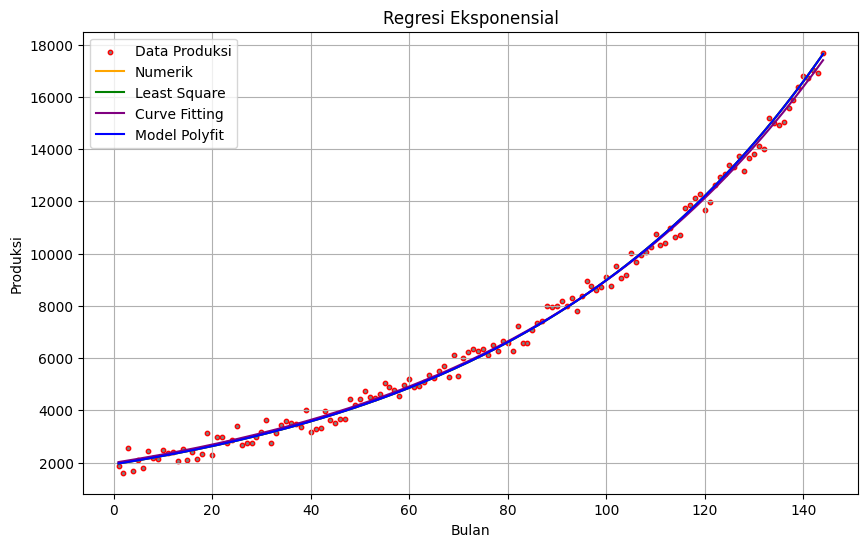

In [30]:
#Menampilkan semua hasil semua metode dengan gambar 
# **Visualisasi Hasil Semua Metode**
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='grey', s=10, label="Data Produksi", edgecolors='red')
plt.plot(x, y_pred_numerik, label="Numerik", color='orange')
plt.plot(x, y_pred_ls, label="Least Square", color='green')
plt.plot(x, y_pred_cf, label="Curve Fitting", color='purple')
plt.plot(x, regression_line_polyfit, label="Model Polyfit", color='blue')
plt.title("Regresi Eksponensial")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()

In [32]:
#Curve fitting menginisialkan dengan curve_fit
#p0=[1,0.03] ini nilai awal untuk parameter a dan b 
#ini digunakan sebagai tebakan awal untuk membantu kita dalam menghitung 
popt, pcov = curve_fit(f_exponensial, x, y, p0=[1, 0.03])

# Menyimpan hasil fitting parameter 'a' dan 'b'
a_fit, b_fit = popt 
# Prediksi menggunakan parameter yang dihasilkan dari curve_fit
y_pred_curve_fit = f_exponensial(x, a_fit, b_fit) 

# **Prediksi untuk y = 25.000 menggunakan curve fitting**
def fungsi_akar_curve_fit(x):
    return a_fit * np.exp(b_fit * x) - 25000  # Mencari nilai x dimana produksi mencapai 25.000
solusi_curve_fit = root_scalar(fungsi_akar_curve_fit, bracket=[x.min(), x.max() + 50])
print("\nMetode Curve Fitting:")
print(f"a = {a_fit:.3f}, b = {b_fit:.3f}")
print(f"Prediksi untuk x (produksi 25.000): {solusi_curve_fit.root:.3f} bulan")

# **Metode Pencarian Akar**
# Menggunakan metode Brent
def find_x_brent(y_target):
    def function(x):
        return f_exponensial(x, a_fit, b_fit) - y_target # Selisih antara prediksi dan target
    result = root_scalar(function, bracket=[x.min(), x.max() + 50], method='brentq') # Metode Brent untuk mencari akar
    if result.converged:
        return result.root
    else:
        return None
x_prediksi_brent = find_x_brent(25000) # Prediksi untuk y = 25000
print(f'Prediksi menggunakan metode Brent: x = {x_prediksi_brent:.2f} bulan')

# Menggunakan Metode Newton-Raphson
def f_newton(x):
    return a_fit * np.exp(b_fit * x) - 25000 # Fungsi untuk mencari akar
def g_newton(x):
    return a_fit * b_fit * np.exp(b_fit * x) # Turunan pertama dari fungsi

# Newton-Raphson manual
def newton_rhapson(x0, iter, threshold=0.001, max_iter=100):
    if iter >= max_iter:
        print('Jumlah iterasi maksimum tercapai')
        return
    x1 = x0 - f_newton(x0) / g_newton(x0)  # Rumus Newton-Raphson
    if abs(f_newton(x1)) < threshold:  # Jika sudah cukup dekat dengan akar
        print(f'Prediksi menggunakan Newton-Raphson: x = {x1:.3f} bulan')
        return
    newton_rhapson(x1, iter + 1)
# Mulai dengan tebakan x0 = 10
newton_rhapson(10, 0)

# Menggunakan Metode Newton dari Scipy
x_prediksi_newton = newton(f_newton, x0=10, fprime=g_newton) # Scipy Newton method
print(f'Prediksi menggunakan Newton-Raphson (scipy): x = {x_prediksi_newton:.3f} bulan')

# Menggunakan Metode Bisection
def bisection(left, right, iter, threshold=0.001, max_iter=100):
    if iter >= max_iter:
        print('Jumlah iterasi maksimum tercapai')
        return
    if f_newton(left) * f_newton(right) >= 0:
        print('Akar mungkin tidak ada dalam rentang ini')
        return
    mid = (left + right) / 2  # Titik tengah
    if np.abs(f_newton(mid)) <= threshold:
        print(f'Prediksi menggunakan Bisection: x = {mid:.3f} bulan')
        return
    if f_newton(left) * f_newton(mid) >= 0:
        bisection(mid, right, iter + 1)
    elif f_newton(mid) * f_newton(right) >= 0:
        bisection(left, mid, iter + 1)
bisection(144,250,0)  # Pencarian akar dalam rentang tertentu

# Menggunakan Metode Bisect dari Scipy
x_prediksi_bisection = bisect(f_newton, a=144, b=200)  # Scipy Bisection method
print(f'Prediksi menggunakan Bisection (scipy): x = {x_prediksi_bisection:.3f} bulan')



Metode Curve Fitting:
a = 1991.285, b = 0.015
Prediksi untuk x (produksi 25.000): 168.057 bulan
Prediksi menggunakan metode Brent: x = 168.06 bulan
Prediksi menggunakan Newton-Raphson: x = 168.057 bulan
Prediksi menggunakan Newton-Raphson (scipy): x = 168.057 bulan
Prediksi menggunakan Bisection: x = 168.057 bulan
Prediksi menggunakan Bisection (scipy): x = 168.057 bulan



Metode Numerik:
a = 1937.014, b = 0.015
MSE: 88911.150, Error: 0.042%
Prediksi x untuk y = 25.000: 166.732 bulan


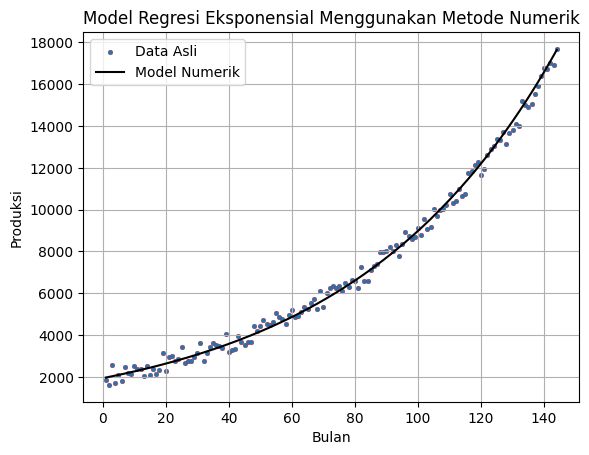

In [33]:
#**1.metode numerik**
log_y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
b, log_a = np.linalg.lstsq(A, log_y, rcond=None)[0] # Menghitung parameter regresi
a = np.exp(log_a) # Mengembalikan nilai a ke domain aslinya

# Model prediksi
y_pred_numerik = f_exponensial(x, a, b)

# MSE dan error
mse_numerik = mean_squared_error(y, y_pred_numerik)
error_numerik = (np.sqrt(mse_numerik)) / (np.sum(y) / len(x))

# Prediksi x untuk y = 25.000
def fungsi_akar_numerik(x):
    return a * np.exp(b * x) - 25000
solusi_numerik = root_scalar(fungsi_akar_numerik, bracket=[x.min(), x.max() + 50])
print("\nMetode Numerik:")
print(f"a = {a:.3f}, b = {b:.3f}")
print(f"MSE: {mse_numerik:.3f}, Error: {error_numerik:.3f}%")
print(f"Prediksi x untuk y = 25.000: {solusi_numerik.root:.3f} bulan")

# Visualisasi hasil
plt.scatter(x, y, s=12, linewidths=0.2, edgecolors='red', label="Data Asli")
plt.plot(x, y_pred_numerik, c='black', label="Model Numerik")
plt.title("Model Regresi Eksponensial Menggunakan Metode Numerik")
plt.xlabel("Bulan")
plt.ylabel("Produksi")
plt.legend()
plt.grid()
plt.show()

In [34]:
import numdifftools as nd  

# Parameter a dan b hasil fitting sebelumnya
a = a_fit
b = b_fit

# Titik awal untuk pengembangan deret Taylor
x0 = 0  # Nilai titik awal pengembangan Taylor Series

# Menghitung nilai fungsi eksponensial pada titik x0
f0 = f_exponensial(x0, a, b)  # Nilai fungsi di x0
# Menghitung turunan pertama hingga ketiga pada titik x0 menggunakan numdifftools
f1 = nd.Derivative(lambda x: f_exponensial(x, a, b), n=1)(x0)
f2 = nd.Derivative(lambda x: f_exponensial(x, a, b), n=2)(x0)
f3 = nd.Derivative(lambda x: f_exponensial(x, a, b), n=3)(x0)
# Fungsi untuk menghitung pendekatan nilai fungsi menggunakan deret Taylor
def taylor(x):
    return (
        f0 +
        f1 * (x - x0) +
        (f2 / 2) * (x - x0)**2 +
        (f3 / 6) * (x - x0)**3
    )

# Nilai x_target yang ingin dihitung pendekatannya
x_target = 6  # Titik target untuk menghitung pendekatan
taylor_result = taylor(x_target)  # Hasil pendekatan menggunakan Taylor Series

# Menampilkan hasil pendekatan
print("Hasil Pendekatan Taylor Series:")
print(f'f({x_target}) ≈ {taylor_result:.3f}')


Hasil Pendekatan Taylor Series:
f(6) ≈ 2179.526


In [37]:
#Curve fitting menginisialkan dengan curve_fit
#p0=[1,0.03] ini nilai awal untuk parameter a dan b 
#ini digunakan sebagai tebakan awal untuk membantu kita dalam menghitung 
popt, pcov = curve_fit(f_exponensial, x, y, p0=[1, 0.03])

# Menyimpan hasil fitting parameter 'a' dan 'b'
a_fit, b_fit = popt 
# Prediksi menggunakan parameter yang dihasilkan dari curve_fit
y_pred_curve_fit = f_exponensial(x, a_fit, b_fit) 

# **Prediksi untuk y = 25.000 menggunakan curve fitting**
def fungsi_akar_curve_fit(x):
    return a_fit * np.exp(b_fit * x) - 25000  # Mencari nilai x dimana produksi mencapai 25.000
solusi_curve_fit = root_scalar(fungsi_akar_curve_fit, bracket=[x.min(), x.max() + 50])
print("\nMetode Curve Fitting:")
print(f"a = {a_fit:.3f}, b = {b_fit:.3f}")
print(f"Prediksi untuk x (produksi 25.000): {solusi_curve_fit.root:.3f} bulan")



Metode Curve Fitting:
a = 1991.285, b = 0.015
Prediksi untuk x (produksi 25.000): 168.057 bulan


In [39]:
# **Metode Pencarian Akar**
# Menggunakan metode Brent
def find_x_brent(y_target):
    def function(x):
        return f_exponensial(x, a_fit, b_fit) - y_target # Selisih antara prediksi dan target
    result = root_scalar(function, bracket=[x.min(), x.max() + 50], method='brentq') # Metode Brent untuk mencari akar
    if result.converged:
        return result.root
    else:
        return None
x_prediksi_brent = find_x_brent(25000) # Prediksi untuk y = 25000
print(f'Prediksi menggunakan metode Brent: x = {x_prediksi_brent:.3f} bulan')

# Menggunakan Metode Newton-Raphson
def f_newton(x):
    return a_fit * np.exp(b_fit * x) - 25000 # Fungsi untuk mencari akar
def g_newton(x):
    return a_fit * b_fit * np.exp(b_fit * x) # Turunan pertama dari fungsi

# Newton-Raphson manual
def newton_rhapson(x0, iter, threshold=0.001, max_iter=100):
    if iter >= max_iter:
        print('Jumlah iterasi maksimum tercapai')
        return
    x1 = x0 - f_newton(x0) / g_newton(x0)  # Rumus Newton-Raphson
    if abs(f_newton(x1)) < threshold:  # Jika sudah cukup dekat dengan akar
        print(f'Prediksi menggunakan Newton-Raphson: x = {x1:.3f} bulan')
        return
    newton_rhapson(x1, iter + 1)
# Mulai dengan tebakan x0 = 10
newton_rhapson(10, 0)

# Menggunakan Metode Newton dari Scipy
x_prediksi_newton = newton(f_newton, x0=10, fprime=g_newton) # Scipy Newton method
print(f'Prediksi menggunakan Newton-Raphson (scipy): x = {x_prediksi_newton:.3f} bulan')

# Menggunakan Metode Bisection
def bisection(left, right, iter, threshold=0.001, max_iter=100):
    if iter >= max_iter:
        print('Jumlah iterasi maksimum tercapai')
        return
    if f_newton(left) * f_newton(right) >= 0:
        print('Akar mungkin tidak ada dalam rentang ini')
        return
    mid = (left + right) / 2  # Titik tengah
    if np.abs(f_newton(mid)) <= threshold:
        print(f'Prediksi menggunakan Bisection: x = {mid:.3f} bulan')
        return
    if f_newton(left) * f_newton(mid) >= 0:
        bisection(mid, right, iter + 1)
    elif f_newton(mid) * f_newton(right) >= 0:
        bisection(left, mid, iter + 1)
bisection(144,250,0)  # Pencarian akar dalam rentang tertentu

# Menggunakan Metode Bisect dari Scipy
x_prediksi_bisection = bisect(f_newton, a=144, b=200)  # Scipy Bisection method
print(f'Prediksi menggunakan Bisection (scipy): x = {x_prediksi_bisection:.3f} bulan')


Prediksi menggunakan metode Brent: x = 168.057 bulan
Prediksi menggunakan Newton-Raphson: x = 168.057 bulan
Prediksi menggunakan Newton-Raphson (scipy): x = 168.057 bulan
Prediksi menggunakan Bisection: x = 168.057 bulan
Prediksi menggunakan Bisection (scipy): x = 168.057 bulan
